In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.datasets import make_classification
from sklearn.ensemble import * 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR, SVC


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
sns.set(style='darkgrid')

In [2]:
data = pd.read_csv('../data/clean_data.csv')

In [3]:
data['rating'] = round(data['likes'] / (data['likes']+data['dislikes']), ndigits=5)

In [4]:
data.loc[data['likes'] == 0, 'rating'] = 0 


In [57]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,description_len,rating,engagement,tags_count,publish_day,trending_lag_time,like_rate
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,0,0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1410,0.95097,0.021318,1,2017-11-13,1,0.076869
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,0,0,"One year after the presidential election, John...",630,0.94052,0.005252,4,2017-11-13,1,0.040179
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1177,0.96473,0.002563,23,2017-11-12,2,0.045758
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,0,0,Today we find out if Link is a Nickelback amat...,1403,0.93855,0.006253,27,2017-11-13,1,0.029641
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,0,0,I know it's been a while since we did this sho...,636,0.98518,0.008359,14,2017-11-12,2,0.063097


In [5]:
data.isna().sum()


Unnamed: 0                0
video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
description_len           0
rating                    0
engagement                0
tags_count                0
publish_day               0
trending_lag_time         0
like_rate                 0
dtype: int64

In [37]:
data.drop(columns='Unnamed: 0',inplace=True)

In [39]:
data.to_csv('../data/clean_data.csv',index=False)

In [6]:
features = ['views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed',
       'description_len', 'rating', 'engagement', 'tags_count',
       'trending_lag_time', 'like_rate']

In [7]:
np.random.seed(123)

In [8]:
ss = StandardScaler()
ss_df = pd.DataFrame(ss.fit_transform(data[features]),
                        columns = data[features].columns).copy()

ss_df.head()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description_len,rating,engagement,tags_count,trending_lag_time,like_rate
0,-0.219613,-0.075224,-0.026500,0.198272,-0.12475,-0.063055,-0.023792,0.438054,0.182176,2.930120,-1.568795,-1.094021,1.565407
1,0.005568,0.097486,0.082656,0.111713,-0.12475,-0.063055,-0.023792,-0.475090,0.093231,0.135193,-1.318538,-1.094021,0.206230
2,0.109725,0.310218,0.054955,-0.008686,-0.12475,-0.063055,-0.023792,0.165281,0.299293,-0.332481,0.266426,-0.898740,0.412885
3,-0.274237,-0.281453,-0.105450,-0.169370,-0.12475,-0.063055,-0.023792,0.429859,0.076464,0.309447,0.600103,-1.094021,-0.184143
4,-0.037982,0.250128,-0.060037,0.239913,-0.12475,-0.063055,-0.023792,-0.468065,0.473352,0.675704,-0.484346,-0.898740,1.055225


In [9]:
ss_df.isna().sum()

views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description_len           0
rating                    0
engagement                0
tags_count                0
trending_lag_time         0
like_rate                 0
dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(ss_df.drop(columns =['views']),
                                                    ss_df['views'],
                                                    test_size = .25,
                                                    random_state = 1238,
                                                    shuffle=True)

In [11]:
len(list(X_train.columns))

12

In [12]:
X_train.isna().sum() # bring this up to will. Standard scalar creates a bunch of NA's

likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description_len           0
rating                    0
engagement                0
tags_count                0
trending_lag_time         0
like_rate                 0
dtype: int64

In [13]:
X_train.head()

,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description_len,rating,engagement,tags_count,trending_lag_time,like_rate
10892,0.197598,0.779028,0.702367,-0.12475,-0.063055,-0.023792,1.292662,-0.935120,0.255646,0.683522,-0.312897,-0.523687
25388,-0.307762,-0.117705,-0.205394,-0.12475,-0.063055,-0.023792,-0.099296,0.007181,-0.534035,0.850360,0.663509,-1.011107
6770,-0.131337,-0.047680,-0.126530,-0.12475,-0.063055,-0.023792,-0.557038,0.174005,-0.349130,0.266426,-0.508178,-0.195385
3805,-0.234546,-0.098379,-0.191788,-0.12475,-0.063055,-0.023792,1.167398,0.259289,-0.575489,1.017199,-0.508178,-0.588175
35191,-0.066496,-0.045345,0.007608,-0.12475,-0.063055,-0.023792,-0.450505,0.267375,0.810474,-1.568795,0.858790,1.008538


In [14]:
# With Standard Scalar 
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

bag_reg = BaggingRegressor()
bag_reg.fit(X_train, y_train)

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X_train, y_train)

svr = SVR()
svr.fit(X_train, y_train)

nn_reg = Sequential()
nn_reg.add(Dense(50, input_shape=(12,), activation='relu'))
nn_reg.add(Dropout(.25))
nn_reg.add(Dense(50, activation='relu'))

nn_reg.add(Dense(1, activation=None))

nn_reg.compile(loss='mse',optimizer='adam')
hist = nn_reg.fit(X_train,y_train, epochs=50)

C:\Users\oaher\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\oaher\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train on 30491 samples
Epoch 1/50
30491/30491 [==============================] - 2s 71us/sample - loss: 0.2323
Epoch 2/50
30491/30491 [==============================] - 2s 57us/sample - loss: 0.0927
Epoch 3/50
30491/30491 [==============================] - 2s 64us/sample - loss: 0.0918
Epoch 4/50
30491/30491 [==============================] - 2s 58us/sample - loss: 0.0532
Epoch 5/50
30491/30491 [==============================] - 2s 65us/sample - loss: 0.0587
Epoch 6/50
30491/30491 [==============================] - 2s 58us/sample - loss: 0.0511
Epoch 7/50
30491/30491 [==============================] - 2s 58us/sample - loss: 0.0599
Epoch 8/50
30491/30491 [==============================] - 2s 65us/sample - loss: 0.0514
Epoch 9/50
30491/30491 [==============================] - 2s 58us/sample - loss: 0.0464
Epoch 10/50
30491/30491 [==============================] - 2s 58us/sample - loss: 0.0483
Epoch 11/50
30491/30491 [==============================] - 2s 58us/sample - loss: 0.0431
Epoch 1

In [15]:
reg_models = [linear_reg,knn_reg, tree_reg,bag_reg,random_forest_reg,adaboost_reg,svr,nn_reg]

In [26]:
def get_score(model):
    r2_train, r2_test = r2_score(model.predict(X_train),y_train),r2_score(model.predict(X_test), y_test)
    rmse_train, rmse_test = mean_squared_error(model.predict(X_train),y_train)**2,mean_squared_error(model.predict(X_test),y_test)**2
    return r2_train, r2_test, rmse_train,rmse_test

In [89]:
d = {
    'LinearRegression': [],
    'KNeighborsRegressor': [],
    'DecisionTreeRegressor': [],
    'BaggingRegressor':[],
    'RandomForestRegressor':[],
    'AdaBoostRegressor':[],
    'SVR':[],
    'KerasRegressor':[]
}
pd.DataFrame(d)

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,SVR,KerasRegressor


In [90]:
len(d.keys())

8

In [91]:
for i in range(8):
        d[list(d.keys())[i]] = [x for x in get_score(reg_models[i]) ]
pd.DataFrame(d)

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor,BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,SVR,KerasRegressor
0,0.778436,0.975715,1.000000e+00,0.998399,0.998752,0.071224,0.659420,0.980821
1,0.786858,0.958741,9.565481e-01,0.992966,0.985983,0.238648,0.572746,0.978653
2,0.029869,0.000478,5.460960e-16,0.000002,0.000001,0.432877,0.034909,0.000262
3,0.039104,0.001881,3.477376e-03,0.000071,0.000286,0.433385,0.066025,0.000483


In [92]:
model_df = pd.DataFrame(d).T

In [96]:
model_df.rename(columns={0:'R2 train', 1:'R2 test',2:'RMSE train',3:'RMSE test'}, inplace=True)

In [113]:
model_df.to_csv('../data/result.csv')

In [70]:
for i in reg_models:
    results = get_score(i)
    print(f'{i}'.split('(')[0])
    print(f'R2 Train: {results[0]}, R2 Test: {results[1]}')
    print(f'RMSE Train: {results[2]}, RMSE Test: {results[3]}')

LinearRegression
R2 Train: 0.7784358976173403, R2 Test: 0.7868580432504118
RMSE Train: 0.029868782616401406, RMSE Test: 0.03910427946272187
KNeighborsRegressor
R2 Train: 0.9757150245077121, R2 Test: 0.9587413247011691
RMSE Train: 0.0004782200172297769, RMSE Test: 0.0018812470566389233
DecisionTreeRegressor
R2 Train: 0.9999999754750066, R2 Test: 0.9565480767999027
RMSE Train: 5.460960375271421e-16, RMSE Test: 0.0034773757982478628
BaggingRegressor
R2 Train: 0.9983994449204379, R2 Test: 0.992965525383475
RMSE Train: 2.292109651720641e-06, RMSE Test: 7.08670183871247e-05
RandomForestRegressor
R2 Train: 0.99875177533783, R2 Test: 0.9859833526873625
RMSE Train: 1.3720906929609986e-06, RMSE Test: 0.0002864565363673974
AdaBoostRegressor
R2 Train: 0.0712243761800243, R2 Test: 0.23864764878929912
RMSE Train: 0.4328768407848885, RMSE Test: 0.43338508048086427
SVR
R2 Train: 0.6594204920000126, R2 Test: 0.5727455331992684
RMSE Train: 0.034908623727448324, RMSE Test: 0.06602485653241101
R2 Train: 0

In [42]:
import matplotlib.pyplot as plt

(13.0, 0.0)

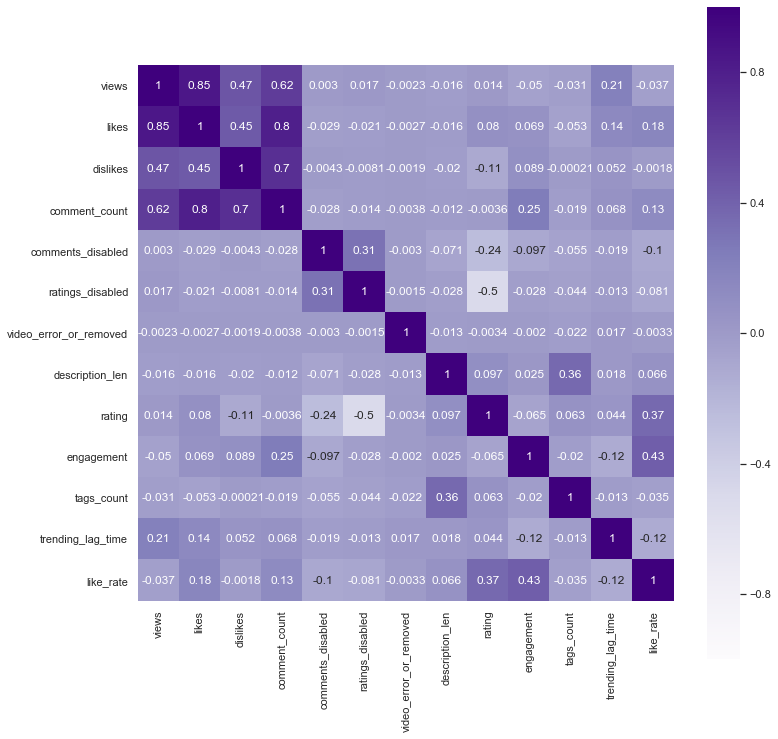

In [114]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.drop(columns='category_id').corr(), 
            cmap='Purples', 
            annot=True,
            vmax=1,
            vmin=-1,
           square = True)
# Thanks SalMac86! 
# https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

C:\Users\oaher\Anaconda3\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\oaher\Anaconda3\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\oaher\Anaconda3\lib\site-packages\seaborn\algorithms.py:88: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))


(0, 2766759.7309766673)

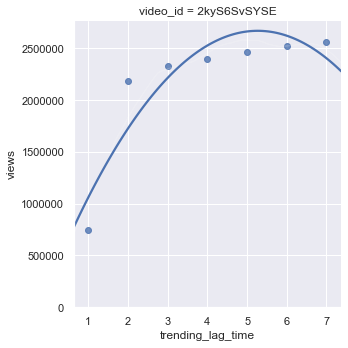

In [59]:
sns.lmplot(x='trending_lag_time', y='views', data=data.loc[data['video_id'] == '2kyS6SvSYSE',:], col='video_id',ci=False, order=2);
plt.ylim(0,)

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([4.78220017e-04, 9.80019005e-02, 1.95525581e-01, 2.93049261e-01,
        3.90572942e-01, 4.88096622e-01, 5.85620303e-01, 6.83143983e-01,
        7.80667664e-01, 8.78191344e-01, 9.75715025e-01]),
 <a list of 10 Patch objects>)

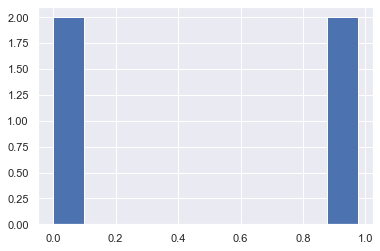